# Data Intelligence exam
### IT University of Copenhagen - Spring semester 2021
Student B | bbb@itu.dk | 25/5/2021 || Teacher: Jens Gwen Stein | jeej@itu.dk || Course code: BBDAINT1KU

## Introduction

In this paper, I will investigate the provided data-set "rentals.csv". I will firstly explore and describe the data to get an inital understanding of and contextualize the data-set. Based on the data, I will then pose a research question and form an initial hypothesis about what I expect the outcome to be. In the data preparation and cleaning section I will then leverage the technical and conceptual tools presented in the Data Intelligence course to prepare and clean the data. Furthermore, I will analyse the given data set with the aim of validating or falsifying my hypothesis. Based on my findings in the analysis part, I will discuss and potentially revise my hypothesis, before conlcuding the report as well as discuss potential limitations and other reflections.

#### Libraries

In order to perform a coherent analysis of the data including data visualizations it is important that suitable libraries are installed.

**pandas:**
Pandas is a software library used for the Python programming language which, when installed, offers data structures that enable the user to manipulate and analyse data utilizing large arrays.

**matplotlib:**
Matplotlib is a library that enables basic data visualizations in Python. Those visualizations can take a variety of forms like bar charts, line charts, pie charts and scatter plots etc.  

**seaborn:**
Seaborn is a data visualization library built on top of matplotlib. It provides a larger variety of visualization patterns than matplotlib as well as fewer syntax.

**numpy:** 
Numpy is a library used for general array-processing in Python which works well with pandas. I might need to use numpy in the data cleaning section in oder to get the np.nan value.

**sklearn:** 
Sklearn is a library for machine learning in Python providing tools for machine learning and statistical modeling. This, among others, includes classification, regression and clustering tools which I will apply in the analysis section.

In [1]:
#installing needed libraries
!pip install -U pandas scikit-learn matplotlib scipy delayed

#import of all relevant libraries and packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.linear_model
import sklearn.ensemble
import sklearn.metrics

Requirement already up-to-date: pandas in ./opt/anaconda3/lib/python3.8/site-packages (1.2.4)
Requirement already up-to-date: scikit-learn in ./opt/anaconda3/lib/python3.8/site-packages (0.24.2)
Requirement already up-to-date: matplotlib in ./opt/anaconda3/lib/python3.8/site-packages (3.4.2)
Requirement already up-to-date: scipy in ./opt/anaconda3/lib/python3.8/site-packages (1.6.3)
Requirement already up-to-date: delayed in ./opt/anaconda3/lib/python3.8/site-packages (0.11.0b1)


## Data exploration

In this section, I will load the data-set and inspect parts of the data in order to get a better understanding of the variables the data-set consists of. I will describe my findings in the descriptions of the data section before posing my initial hypothesis. 

In [2]:
#load the data set 
!head -n10 rentals.csv

id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.9419,Private room,150,3,0,,,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.975,Entire home/apt,200,3,74,201

In [3]:
def load_data(path):
    return pd.read_csv(path)

In [4]:
#load dataset
df = load_data("rentals.csv")

In [5]:
# view the first few lines of the data-set
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
#Find out data types and potential missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
# Find out maximum, minimun values, the means or counts etc. of each column
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
#Find out which neighbourhood groups exist to check whether the rentals are all in an area belonging to New York City
df["neighbourhood_group"].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [9]:
#Find out which different room types exist
df["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

### Description of the data

In the following I will describe the data-set (rentals.csv) explaining the data itself, its type, format and the context it is placed in aiming to get a better understanding of the data-set. I will also follow Rowntree's (1981) suggestion to describe the data's common attributes or variable characteristics distinguishing between category-variables, which can be either nominal (different group/category names) or ordinal (placing the data into ranked/ordered categories) and quantity-variables, made of either continuous data (which can be measured) or discrete data (which can be counted). 

The given data set consists of 48895 rows and 16 columns and thus contains data about 48895 rental objects in five areas (Brooklyn, Manhattan, Queens, Staten Island and Bronx) in New York City (NYC). The source of the data-set is not given, however, judging from the columns and types of data (e.g. including reviews and individual hosts etc.), I assume that the data was scraped from a housing portal/property rental website which contains private listings of people who rent out their properties by creating adverts for their rental objects.

#### **id**
The first column of the data set gives a unique id to each of the rental objects. The rental ids are formatted as integers and range between 2539 and 36487245.

#### **name**
The name column contains the title or name of the rental object as a String value. It is most likely the title given by the landlord when creating the rental advert serving as a short overall description of the rental object. Each name therefore consists of multiple words containing very different descriptions/information, often including the property's location, number of bedrooms, style, or other descriptive adjectives.

#### **host_id**
The host_id column provides a unique id to each of the hosts or landlords which advert one or more retal object(s). The data type of the host_id column is integer containing numbers ranging from 2438 to 274321313. 

#### **host_name**
The host_name column gives information about the hosts/landlords names as String values. The names are not given in a standardized format, but often present only the first name, nicknames, single letters, the first names of two people, names of companies or organizations or even symbols. 

#### **neighbourhood_group**
The neighbourhood_group column contains nominal category-variables assigning each rental object to a lager area. As descibed above, there are five larger areas, Brooklyn, Manhattan, Queens, Staten Island and Bronx, representing city districts which belong to NYC. It therefore presents that city district which each retal object is placed in as a String value. 

#### **neighbourhood**
The neighbourhood column presents nominal category-variables which further specify the neighbourhood the rental object is placed in. These neighbourhoods are smaller areas within the city districts described in the neighbourhood_group column, also given as a String value. 

#### **latitude & longitude**
There are two columns presenting quantiative continuous data (measuring data) as float values which describe the latitude and the longitude of each rental object location. Putting both values together would therefore result in the GPS coordinates describing the exact location of each rental object.

#### **room_type**
Each rental object is categorized as a room type indicating that is can be calssified as nomimal category-variables. The data set hereby contains three different room types: Private room, Entire home/apt and Shared room.

#### **price**
The price column contains quantity-variables in form of discrete values (which can be counted). The price for the rental objects can range from 0 to 10000 and is represented as integer values. The currency and the conditions (e.g. whether the price is the daily/weekly/monthly/annual rent) are not given. However, since the data-set contains only rental objects in NYC, I assume that the currency is US dollars, and, given the high rental prices in NYC and the fairly low values of the price, I assume the prices to represent the price per night for each rental object. 

#### **minimum_nights**
The minimum_nights column also represents quantity-variables in form of discrete values as an integer data type. The values range from 1 night to 1250 nights, indicating the minimun amount of nights the apartment must be rented for.  

#### **number_of_reviews**
The number of reviews is another column containing discrete values as integer data types. The number of reviews for the listings range between 0 reviews and 629 reviews representing the total number of reviews for a specific rental object.

#### **last_review**
The last review column contains data about the date on which the last review was given for a specific rental object. The data type is a String value and the data format is standardized, dividing year, month and day with a dash (yyyy-mm-dd). 

#### **reviews_per_month**
The reviews_per_month column contains a float value representing the average number of reviews the apartment receives per month. Since the average amount of reviews can contain data 'in-between' the values, I classify the data as quantity variables and continuous values which can be measured. 

#### **calculated_host_listing_count**
This column represents the number of listings a specific host/landlord rents out. Each host in the data-set rents out between 1 and 327 rental objects, indicating that some of the hosts might not be private home-owners, but rental companies which own and rent out a large number of properties.
The data in this column are quantity variables in the form of discrete data since it counts the number of rental objects. 

#### **availability_365**
The last column contains discrete data about the number of days during one year (365 days) the apartment is available for as integer numbers. The number of days available thus ranges from 0 to 365 days indicating how many days of the year the property can still be booked for. 

## Research question and hypothesis

Investigating the data-set has raised the question which factors have the highest influence on the price of a rental object. Knowing what factors determine the price of a rental objet could, for example, prove useful to rental platform businesses since it could enable them to build models which can provide suggestions to hosts/landlords about  the price of their rental property according to different metrics. 

Since the columns id, name, host_id and host_name are unique to either individuals or a rental object itself, and can therefore not be generalized, I will not be using these factors to determine the effects on the price of a rental object. 
Given that the data-set provides seven quantity variables containing numerical data (latitude, longitude, minimum nights, the total number of reviews, the average number of reviews per month, the number of listings and the availability throughout the year) and only three category variables (the district in which the rental property is placed in, the specific neighbourhood and the room type), I will aim to answer this question using a linear regression model. In contrast to a random forest model, the linear regression model models the relationship between two quantitative (ideally continuous) variables by fitting a linear equation to observed data. The random forest model on the other hand is used to predict classifications and would thus be more suitable for to predict a specific category an object belongs to. 

I expect the total number of reviews to be largely correlated with the average number of reviews per month and will therefore focus my analysis on only the average number of reviews per month (reviews_per_month) leaving me with six variables/factors to include in a multi variable regression model: latitude, longitude, minimum nights, the average number of reviews per month, the number of listings and the availability throughout the year.

I hypothesize that the latitude and longitude are highly correlated with the price of a rental property since they determine the location of apartments which I assume to often have a high influence on apartment prices. 
I furthermore expect that the minimum number of nights a property is rented for might correlate with the rental price since I expect very temporal stays to be often booked for holidays or short trips which might lead to higher rental prices per night than long-term rentals. 
A higher amount of monthly reviews could suggest a higher price since more people might be interested in the specific property leading to higher demand. However, it will be interesting to see whether the average number of monthly reviews actually has any influence on the apartment. 
I expect a rather low correrlation with the number of listings, since I do not think that a company which rents out multiple apartments can raise the rental price significantly compared to pivate landlords.
Lastly, I assume that there might be a higher availability of the apartment if the price is very high, since I expect a much higher demand for cheaper apartments.

It will be interesting to see whether these factors have an influence on the price in the analysis section. Furthermore, I would like to find out whether including multiple variables in the linear regression model will improve the accuracy of the model, leading to better price predictions for hosts/landlords.

## Data preparation and cleaning 

### Introduction to data pre-processing
Before the dataset can be used for a proper analysis, it first needs to be pre-processed. Pre-processing the data includes cleaning the data, and potentially transforming and rearranging it in order to manipulate it into the right form which can be used more easily in the analysis. In the following section, I will therefore aim to handle missing data, transform certain data into the right format and detect and filter potential outliers. This is a required first step, especially before any machine learning algorithms can be applied, since these algorithms learn from data and the outcome of the analysis is thus strongly dependend on the quality of the data set.

In [10]:
#Check whether there is missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Handling missing values
Since the data set has 48895 entries, the columns with less entries than 48895 have missing values. I thus conclude that there are missing values in the name, host_name, last_review and reviews_per_month columns. 

There are only 16 and 21 missing values for the names and host_name column. In the sections below, I have filtered the rows for which host_name data is missing, and it shows that there is valuable data in the other columns of the rows with missing host_name data. Since I am not planning on using those two columns in my analysis, I will not choose to remove or replace this missing data in order to keep the data in the rest of the columns which might give valuable insights during the analysis.  

For the column last_reviews, there are 10052 missing values. Since the reviews_per_month column takes an average of the reviews given per month, logically it has the same number of missing values. 10052 values make up a large amount of the data-set (over 20%) and I will therefore not drop/remove any of the rows with missing data on those two columns.
Since I will be using the reviews_per_month column, however, as a predictor in my linear regression model, I will need to eliminate or replace the missing values.

In [11]:
#Find specific rows which are missing data on the host_name column
mask = df["host_name"].isna()
df[mask]["host_name"]

360      NaN
2700     NaN
5745     NaN
6075     NaN
6582     NaN
8163     NaN
8257     NaN
8852     NaN
9138     NaN
9817     NaN
14040    NaN
14631    NaN
15174    NaN
19565    NaN
27777    NaN
27962    NaN
28042    NaN
28274    NaN
30570    NaN
32193    NaN
38992    NaN
Name: host_name, dtype: object

In [12]:
#inspect the remaining data in the rows with missing host_name values
df.loc[9817]

id                                             7556587
name                              Sunny Room in Harlem
host_id                                       39608626
host_name                                          NaN
neighbourhood_group                          Manhattan
neighbourhood                                   Harlem
latitude                                      40.82929
longitude                                    -73.94182
room_type                                 Private room
price                                               28
minimum_nights                                       1
number_of_reviews                                    1
last_review                                 2015-08-01
reviews_per_month                                 0.02
calculated_host_listings_count                       1
availability_365                                     0
Name: 9817, dtype: object

#### Rename column
Since the column name "calculated_host_listings_count" is slightly misleading and very long, I will rename the column to "number_of_listings" hoping that this column name is more descriptive about what data the column contains and the shorter name will be easier to work with in the analysis section.  

In [13]:
xf = df.rename(columns={"calculated_host_listings_count": "number_of_listings"})

In [14]:
df = xf.copy()

#### Replace missing values of reviews_per_month
When investigating the data, I found a correlation between all review columns (number_of_reviews, last_review and reviews_per_month). Logically, if the number of reviews are 0, there will not be any past reviews (making the last_review value NaN) leading to another missing value in the reviews_per_month column. In those columns where the number of total reviews is 0, the average amount of reviews per month needs to be 0 as well. I have therefore decided to replace all missing values in the reviews_per_month column with the number 0, in order to eliminate missing values. 

In [15]:
xf = df.copy()
xf["reviews_per_month"] = xf["reviews_per_month"].fillna(0)

In [16]:
df = xf.copy()

## Data visualization and further exploration

According to Robert Grant, "Visualizing is not only useful for communicating messages, but also for the analyst to understand their data in depth." (2019: 6). In the following section, I will therefore aim to visualize different data points, and relations between different data points aiming to get a better overview and understanding of the data. Visualizing the data can help spotting patterns as well as find inconsistencies and potential outliers which would call for further data cleaning. 

#### Plotting price, reviews per month and their correlation

<AxesSubplot:ylabel='Frequency'>

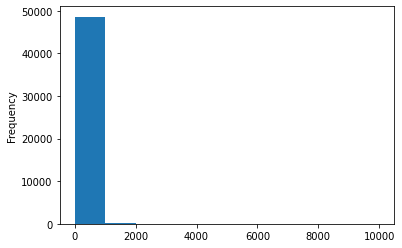

In [17]:
df["price"].plot.hist()

This histogram shows the the frequency of different prices in the data-set. Plotting the data shows, that most prices lie within a range of 0 and 2000.

<AxesSubplot:ylabel='Frequency'>

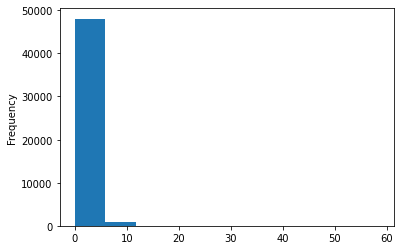

In [18]:
df["reviews_per_month"].plot.hist()

This histogram shows the the frequency of the average in monthly reviews in the data-set. Plotting the data shows, that there are very few data points between 15 and 60 and most monthly average reviews lie within a range of 0 and 12.

<AxesSubplot:xlabel='reviews_per_month', ylabel='price'>

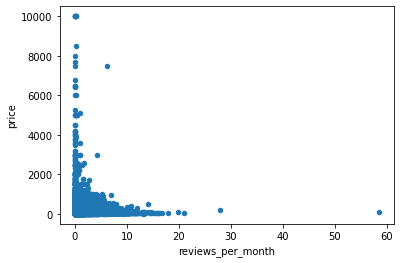

In [19]:
df.plot.scatter("reviews_per_month", "price")

#### Removing outliers 
The visualizations above show that there are very few data points that differ dramatically from all others in both variables, the price and the monthly reviews. These values could cause anomalies in the results obtained through applying machine learning algorithms in the analysis section of this report. 
I will therefore remove the outliers for both categories. Reading from the scatter plot, I will remove all data above 6000 in the "price" column and all data above 20 in the "review_per_month" column. 

In [20]:
df = df[df["price"]<6000]
#Check whether all prices above 6000 were removed
df["price"].max()

5250

In [54]:
df = df[df["reviews_per_month"]<20]

# Check whether all reviews above 20 have been removed
df["reviews_per_month"].max()

19.75

#### New scatter plot using data without outliers

<AxesSubplot:xlabel='reviews_per_month', ylabel='price'>

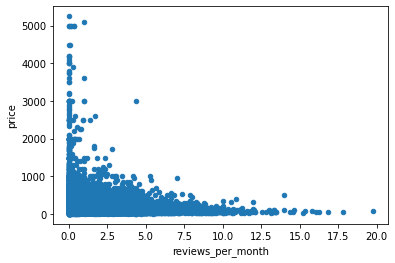

In [22]:
df.plot.scatter("reviews_per_month", "price")

#### Plotting a regression model between average monthly reviews and rental price

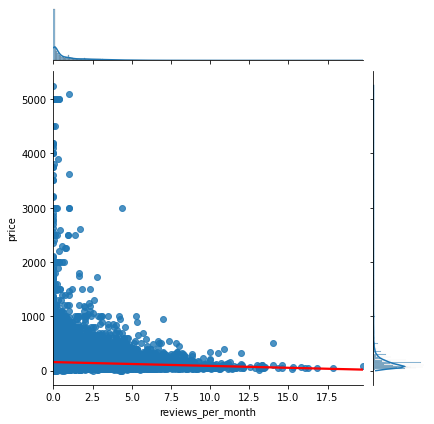

In [23]:
g = sns.jointplot(x="reviews_per_month", y="price", data=df, kind='reg')
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')

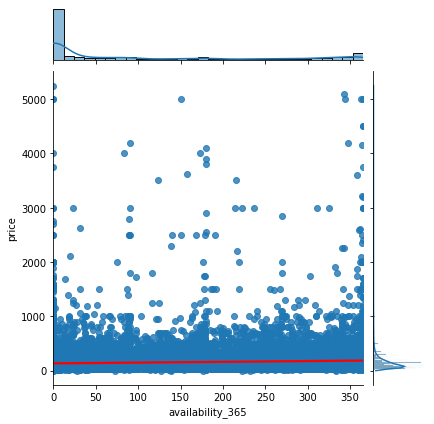

In [24]:
g = sns.jointplot(x="availability_365", y="price", data=df, kind='reg')
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')

Plotting a linear regression between the variables reviews per month and the price as well as availability and price can give a first insight into a potential correlation between them. While the regression plot suggests a rather low correlation, contrary to my initial assumption, there seem to be more monthly reviews on average for cheaper rentals than more expensive properties. The correlation between the availability of a rental object and the price is also very low. However, my assumption that higher priced properties have higher availabilties proved to be true, but the plot is still very scattered, suggestion only a very slight trend toward higher prices for more availability.

#### Correlations between variables

<AxesSubplot:>

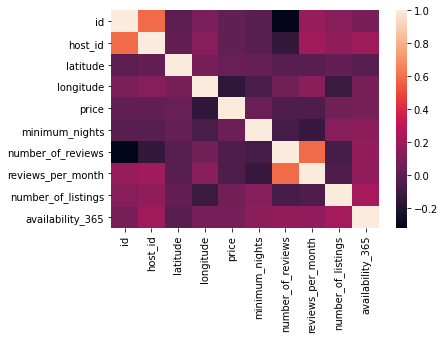

In [25]:
sns.heatmap(xf.corr())

This heat map shows the correlation between the different variables/factors. One can quickly see that there is a high correlation between the number of reviews and the average number of reviews per month which further supports my decision to include only one of those values in my prediction model. 

## Data analysis

In this section I will further investigate my research question trying to find out which factors have the highest influence on the price of a rental object. 

As described when introducing my hypothesis, I will train a linear regression model with all quantitative data in the data aiming to find a correlation between those and the rental price. 
I will then evaluate the findings and make a deicision whether my hypothesis needs to be revised or further analysis is needed for better results. 

#### Splitting the data into training sets and test sets

In [26]:
# Splitting the data into training sets and test sets
def split_data(dataframe, predictors, target, test_size=0.1):
    X = dataframe[predictors]
    y = dataframe[target]
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,
    test_size=test_size, random_state=np.random.RandomState(0))
    return X_train, X_test, y_train, y_test

#### Initiating linear regression model

In [27]:
def linear_regression(dataframe, x, y):
    X_train, X_test, y_train, y_test = split_data(dataframe, x, y)
    model = sklearn.linear_model.LinearRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return sklearn.metrics.r2_score(y_test, preds)

In [28]:
# Evaluating correlation between each of the variables and the price
print(linear_regression(df, ["reviews_per_month"], "price"))
print(linear_regression(df, ["minimum_nights"], "price"))

# Evaluating the longitude and latitude together will most likely give a much higher correlation since it pinpoints the exact location of a rental object
print(linear_regression(df, ["longitude", "latitude"], "price"))

print(linear_regression(df, ["number_of_listings"], "price"))
print(linear_regression(df, ["availability_365"], "price"))

0.0024061181805116183
7.17765775783974e-05
0.03358782806845595
0.002651009549507921
0.00673675387286532


In [29]:
#Multivariable regression
print(linear_regression(df, ["reviews_per_month", "minimum_nights", "longitude", "latitude", "number_of_listings", "availability_365"], "price"))

0.04750476167368112


#### Evaluating the linear regression model

The r2 score which is returned by the model divides the variation in the price variable explained by taking all x variables into account by the variation in price without taking all x variables into account. The score thus tells us how much of the variation in price can be explained by taking reviews per month, the minimum number of nights, the apartments longitude & latitude, the number of listings a host has as well as the apartment's availability throughout the year into account.

The r2 score which was calculated is hereby 0,0475, which is a coefficient of determination of only app. 4,8 % suggesting a very low correlation between an apartment's price and the factors given as the x-variable.
While the r2 score for the models with only one or two variables is even lower, one can see the the longitude and latitude of a retal object has the highest correlatiton with the price among all tested variables. Including multiple variables in the model, however, shows a much higher accuracy of the model than the single variable models. 

## Discussion of analysis results 

#### Taking categorical values into account

Given the low accuracy of my linear regression model, I will aim to transform the categorical data (room_type, neighbourhood_group and neighbourhood) into numerical data (ordinal categories) in order to include those factors in my regression model. This has the purpose of evaluating whether these factors improve the accuracy of the model suggesting that they are determining factors for the price of a property. 

Looking at the categorical variables, I expect very high correlations between them and the price of a property. When renting an apartment, the location and the size of the apartment usually have a big influence on the rent. It is commonly known that big and centrally located apartments are among the most expensive properties. I therefore expect a much higher price for entire homes or apartments than for shared rooms. Similarly, I expect centrally located apartments, for example in Manhattan or Brooklyn, to have an influence on a higher price of the apartment.

In [30]:
# Check average price of each room type to get an idea about potential outcomes of the model
# As expected, entire apartments or homes have a much higher price on average than shared rooms
df.groupby("room_type").mean()["price"]

room_type
Entire home/apt    207.582595
Private room        88.270397
Shared room         70.127586
Name: price, dtype: float64

In [31]:
# Check average price for each of the city districts
# As expected, the average rent in Brooklyn and Manhattan, but also Staten Island seems to be much higher than in the Bronx and Queens 
df.groupby("neighbourhood_group").mean()["price"]

neighbourhood_group
Bronx             87.496792
Brooklyn         122.815920
Manhattan        192.289984
Queens            97.779308
Staten Island    114.812332
Name: price, dtype: float64

In [32]:
df["room_type"]

0           Private room
1        Entire home/apt
2           Private room
3        Entire home/apt
4        Entire home/apt
              ...       
48890       Private room
48891       Private room
48892    Entire home/apt
48893        Shared room
48894       Private room
Name: room_type, Length: 48874, dtype: object

In [33]:
# Give a numerical values for each of the neighbourhoods
df["neighbourhood"] = pd.factorize(df["neighbourhood"])[0]

In [34]:
# Give a numerical values for each of the NYC districts
df["neighbourhood_group"] = pd.factorize(df["neighbourhood_group"])[0]

In [35]:
# Give a numerical values for each room type
df["room_type"] = pd.factorize(df["room_type"])[0]

In [36]:
# Check whether room types have been transformed into numerical values
# 0 = Private room, 1 = Entire home/apartment, 2 = Shared room
df["room_type"].value_counts()

1    25395
0    22319
2     1160
Name: room_type, dtype: int64

In [37]:
# Check whether categories are tranformed into integers
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48874 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   48874 non-null  int64  
 1   name                 48858 non-null  object 
 2   host_id              48874 non-null  int64  
 3   host_name            48853 non-null  object 
 4   neighbourhood_group  48874 non-null  int64  
 5   neighbourhood        48874 non-null  int64  
 6   latitude             48874 non-null  float64
 7   longitude            48874 non-null  float64
 8   room_type            48874 non-null  int64  
 9   price                48874 non-null  int64  
 10  minimum_nights       48874 non-null  int64  
 11  number_of_reviews    48874 non-null  int64  
 12  last_review          38832 non-null  object 
 13  reviews_per_month    48874 non-null  float64
 14  number_of_listings   48874 non-null  int64  
 15  availability_365     48874 non-null 

#### Plotting the regression models for categorical data

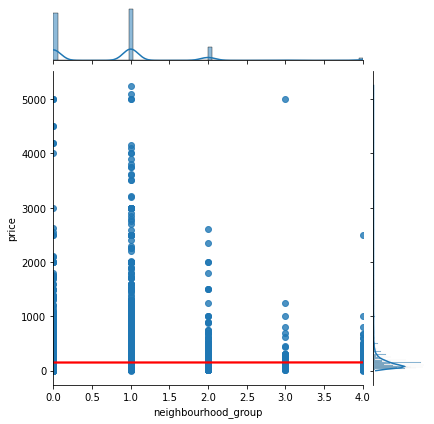

In [38]:
g = sns.jointplot(x="neighbourhood_group", y="price", data=df, kind='reg')
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')

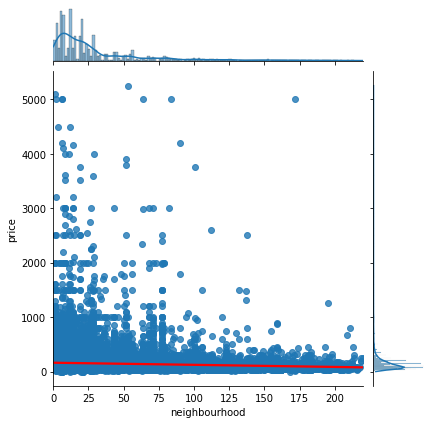

In [39]:
g = sns.jointplot(x="neighbourhood", y="price", data=df, kind='reg')
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')

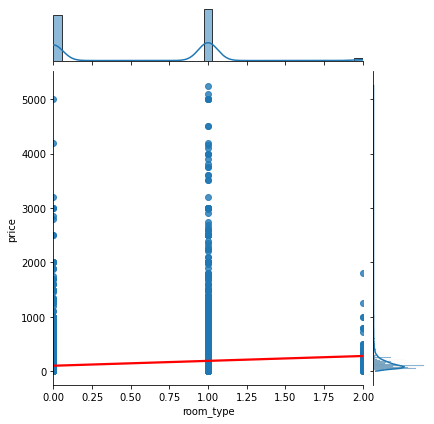

In [40]:
g = sns.jointplot(x="room_type", y="price", data=df, kind='reg')
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')

When plotting the regression models between the price and the categorical/ordinal data shows that a linear regression model might not be suitable for such an analysis. As mention before, linear regression models work best on quantitative data, especially on continuous data/variables (e.g. height and weight). While the price constitutes a continuous variable, transforming the categories into numerical data creates ordinal rankings between a limited amount of numbers. 

There is furthermore a problem, since the transformation has created some kind of ranking which is normally not given on categorical data (the shared room was given the number 2 although it is not different in its value than the private room which was given the number 0). They constitute equally ranked categories which, however, is difficult to express as numerical data.

#### Calculating r2 scores for the regression models including categorical data

In [41]:
# neighbourhood_group added to the model
print(linear_regression(df, ["reviews_per_month", "minimum_nights", "longitude", "latitude", "number_of_listings", "availability_365", "neighbourhood_group"], "price"))

0.04810598930756915


In [42]:
# neighbourhood added to the model
print(linear_regression(df, ["reviews_per_month", "minimum_nights", "longitude", "latitude", "number_of_listings", "availability_365", "neighbourhood"], "price"))

0.04726232660735574


In [43]:
# room_type added to the model
print(linear_regression(df, ["reviews_per_month", "minimum_nights", "longitude", "latitude", "number_of_listings", "availability_365", "room_type"], "price"))

0.09108779411260548


In [44]:
# all categorical variables added to the model
print(linear_regression(df, ["reviews_per_month", "minimum_nights", "longitude", "latitude", "number_of_listings", "availability_365", "room_type", "neighbourhood_group", "neighbourhood"], "price"))

0.09165364237052309


#### Results of the hypothesis revision
Adding the categorical data to the linear regression model has visibily improved the r2 value. As expected, especially the housing type and the location of the rental property in a specific district seem to have large influences on the pricing of a rental object. 
A multi variable regression model containing all variables (reviews_per_month, minimum_nights, longitude, latitude, number_of_listings, availability_365, room_type, neighbourhood_group, neighbourhood) has achieved the highest r2 score so far, suggesting that all factors together have the highest influence on the price of a rental object. 
However, with a coefficient of determination of 0,0917 or app. 9,27 %, the correlation is still fairly low. 

Since the categorical data seems to hold more meaning, making a random forest model to predict the price by taking the room type, neighbourhood group and neighbourhood might lead to more accurate and pricise results as to how the price is influenced by these categories. 

#### Random Forest Model
Predicting the price using the three categorical variables: room_type, neighbourhood_group and neighbourhood.

In [45]:
# Random Forest model
def random_forest(dataframe):
    rng = np.random.RandomState(0)
    input_features = ["room_type", "neighbourhood_group", "neighbourhood"]
    X_train, X_test, y_train, y_test = split_data(dataframe, input_features, "price")
    model = sklearn.ensemble.RandomForestClassifier(random_state=rng)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    test_report = sklearn.metrics.classification_report(y_test, preds)
    print(test_report)
    feature_importances = "\n\t".join(f"{feature}: {importance:.2f}" for feature, importance in zip(input_features, model.feature_importances_))
    print(f"Feature importances:\n\t{feature_importances}")

In [46]:
random_forest(df)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         2
          25       0.09      0.11      0.10         9
          26       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         3
          28       0.75      0.38      0.50         8
          29       0.00      0.00      0.00        12
          30       0.06      0.04      0.05        25
          31       0.00      0.00      0.00         4
          32       0.50      0.17      0.25         6
          33       0.00      0.00      0.00        12
          34       0.00      0.00      0.00        10
          35       0.13    

#### Predicting which categories have most influence on the price using a Random Forest Model

The accuracy in a random forest model reflects how many predictions were correct, dividing the number of correct predictions by the total number of predictions. 

Running the random forest model using the price as the target value results in a very inaccurrate model with an accuracy of only 7%. 

The output furthermore provides values about the model's precision showcasing how many positive prediction were incorrect (true positives/true positives and false positives) and a recall value representing how many negative predictions were incorrect (true positives/true positives and false negatives). In order to make interpretations of such models easier, the f1 score provides a combination of the the precision and recall value. 

Predicting the specific price of a rental object has led to various f1 scores being 0 making the model very inaccurate and unprecise in its predictions. 

Since the price of a rental property is a quantitative value, and the random forest model works best using categorical data, it might be useful to transform the price into categories and predict price ranges/categories rather than the exact price of a property. 

I will therefore aim to divide the price into different categories, excpecting increased accurracy in the random forest model.

<AxesSubplot:ylabel='Frequency'>

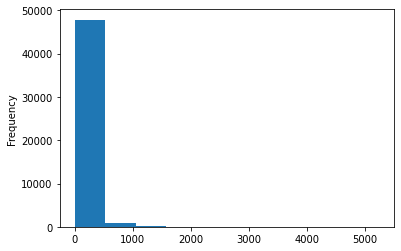

In [47]:
df["price"].plot.hist()

#### Dividing the price data into three price range categories
As described in the visualization and further data exploration section, most housing prices are below 2000. Judging from the histogram showcasing the price frequency, the large majority of the rental properties lie between 0 and 500. Assuming that the values reflect US dollar values, I will devide the price category data into three major categories judging from my experience with rental prices in New York City (which are among the highest rental prices in the US): I consider rental objects below 150 US dollars per night to be in the lower price category, rental objects between 150 US dollars and 500 US dollars in the middle price range and all rentals outside the majority price range of 0-500 US dollars to be in the higher price range.  

In [48]:
def convert_to_price_category(x):
        if x < 150:
            return 1
        elif x > 500:
            return 2
        else:
            return 3

df["price_category"] = df["price"].map(convert_to_price_category)
print(df["price_category"])

0        1
1        3
2        3
3        1
4        1
        ..
48890    1
48891    1
48892    1
48893    1
48894    1
Name: price_category, Length: 48874, dtype: int64


In [55]:
# Check distribution of number of properties in each price category
df["price_category"].value_counts().unique()

array([31908, 15940,  1026])

#### Predicting the price range using the three categorical variables room_type, neighbourhood_group and neighbourhood

In [50]:
def random_forest(dataframe):
    rng = np.random.RandomState(0)
    input_features = ["room_type", "neighbourhood_group", "neighbourhood"]
    X_train, X_test, y_train, y_test = split_data(dataframe, input_features, "price_category")
    model = sklearn.ensemble.RandomForestClassifier(random_state=rng)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    test_report = sklearn.metrics.classification_report(y_test, preds)
    print(test_report)
    feature_importances = "\n\t".join(f"{feature}: {importance:.2f}" for feature, importance in zip(input_features, model.feature_importances_))
    print(f"Feature importances:\n\t{feature_importances}")

In [51]:
random_forest(df)

              precision    recall  f1-score   support

           1       0.84      0.87      0.86      3195
           2       0.00      0.00      0.00       136
           3       0.68      0.68      0.68      1557

    accuracy                           0.79      4888
   macro avg       0.51      0.52      0.51      4888
weighted avg       0.77      0.79      0.78      4888

Feature importances:
	room_type: 0.64
	neighbourhood_group: 0.14
	neighbourhood: 0.21


As expected, predicting price ranges using the Random Forest Model achieves a much higher model accuracy of 79%. Furthermore, the f1 score for the lower and higher price categories is much higher with a 86% and 68% making the model much better at predicting the price category as the previous model. However, the f1 score for the middle price range still reflects 0. 
As expected, the feature importances values also show that the type of rooms/apartment have the lagest influence on the pricing. It is suprising that specific neighbourhoods seem to have a larger influence on the price category than the overall city district. 

#### Predicting the price range using the multiple variables, not only categorical data
In the following model, I will use not only the categorical data to predict the price category, but also reviews_per_month, minimum_nights, the latitude and longitude, hoping that adding this data will lead to a more accurate random forest model.

In [56]:
def random_forest(dataframe):
    rng = np.random.RandomState(0)
    input_features = ["room_type", "neighbourhood_group", "neighbourhood", "reviews_per_month", "minimum_nights", "latitude", "longitude"]
    X_train, X_test, y_train, y_test = split_data(dataframe, input_features, "price_category")
    model = sklearn.ensemble.RandomForestClassifier(random_state=rng)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    test_report = sklearn.metrics.classification_report(y_test, preds)
    print(test_report)
    feature_importances = "\n\t".join(f"{feature}: {importance:.2f}" for feature, importance in zip(input_features, model.feature_importances_))
    print(f"Feature importances:\n\t{feature_importances}")

In [53]:
random_forest(df)

              precision    recall  f1-score   support

           1       0.85      0.87      0.86      3195
           2       0.48      0.08      0.14       136
           3       0.68      0.69      0.69      1557

    accuracy                           0.79      4888
   macro avg       0.67      0.55      0.56      4888
weighted avg       0.79      0.79      0.79      4888

Feature importances:
	room_type: 0.22
	neighbourhood_group: 0.02
	neighbourhood: 0.05
	reviews_per_month: 0.14
	minimum_nights: 0.07
	latitude: 0.23
	longitude: 0.27


Adding the remaining quantity variables has clearly improved the model's accuracy slightly. The overall accuracy has stayed the same at 79%, but the macro and weighted average have increased slightly. Furthermore, the f1 score on predicting the middle price range has risen from 0% to 14 % making the predictions slightly more accurate. 

However, one needs to take into account that this model will only predict a price range rather than a specific price for a rental property. This information might therefore not be as useful to hosts or landlords than an exact price. 

## Conclusion

I have initially stated the research question asking which factors have the highest influence on the price of a rental object. This question is useful in order to build an accurate prediction model which can predict the rental price based on other metrics which could prove useful to hosts and landords who are seeking to determine the price for their rental properties. 

Throughout the analysis, I have built several linear regression models which turned out to be rather inaccurate suggesting that there was a rather low influence of the tested variables on the price of a rental object. I have then built multiple random forest models taking categorical data into account which turned out to have much better predictions. The type of room and location (room_type, neighbourhood group, neighbourhood and longitude and latitude) turned out to be correlated the highest with rental price which validated my expectation. 

Although the random forest model was much more accurate, it needs to be taken into account that it does not predict a specific price, but rather a price range which might be less valuable information for hosts/landlords. However, a valuable learning is furthermore that taking more variables into account in order to predict the price has led to more accurate predictions suggesting that the pricing for rentals is dynamic and based on various factors, and not just one. 

### Limitations and reflections

A large limitation to my analysis is certainly my limited knowledge about prediction models. Throughout the Data Intelligence course we were only introduced to two different machine leaning models: linear regression models and the random forest model. Knowing about other models could have potentially enabled me to build a much more accurate prediction model. 

Another limitation I would like to point out is the fact that there is always some kind of bias and assumptions built into the algorithmic models. One assumption I have, for example, built into my prediction model is that rental properties below 150 US dollars per night belong to a lower price range while properties above 500 US dollars belong to a higher price range. If I was familiar with the standard prices and price ranges in New York City, my model would certainly have turned out differenly leading to different predictions and accuracies.

Furthermore, the amount and type of variables can be considered a limitation to my model. I was able to include the room type and location into the models which proved to have a rather high correlation with rental prices. However, I assume that taking other variables such as apartment size, age of the property, whether it is furnished or not or newly renovated or in need of renovation etc. into account could lead to a much more accurate prediction model.

I would also like to point out that handling missing data, and especially removing outliers might have unintended consequences. Barocas, Hardt & Narayanan (2020) argue that 
"the messiness of the real world isn’t just an annoyance to be dealt with by cleaning, it is instead a manifestation of the limitations of data-driven techniques.". It is thus important to consider that, although cleaning the data often leads to better prediction results, it might, to some extent, alter the representation of the real world potentially excluding minority groups.  

Lastly, it is important to look out for algorithmic and statistical bias and the unintended enactment of existing presumptions creating inequalities. Barocas, Hardt & Narayanan (2020) argue that "The fact that machine learning is “evidence-based” by no means ensures that it will lead to accurate, reliable, or fair decisions.". Algorithmic data often has an influence on the real world in that it enacts realities by influencing people's decision making. Choosing rental prices using a prediction model will rather replicate past dynamics since the predictions are based on historical data not allowing new ways of pricing apartments. It might also leave out important metrics or variables which are not taken into account in the model. It has often been mentioned that rent price fluctuations have significant effects on the population, determining who is able to afford an apartment in a specific location or not. It is therefore crucial to make sure that such influences are taken into account when intoducing such a model in the real world.

## References

Barocas, S., Hardt, M. and Narayanan, A. (2020) Fairness and machine learning. Chapter 1: Introduction.

Grant, R. (2019) Data Visualization - Charts, Maps, and Interactive Graphics. Taylor & Francis Group, LLC.

Rowntree, D. (1981) Statistics Without Tears - A Primer for Non-mathematicians. Charles Scribner's Sons, New York. 